### Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1.fitting it to the periodic function
2.plot the fit
Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [2]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Data

Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

Month = range(1, 13)

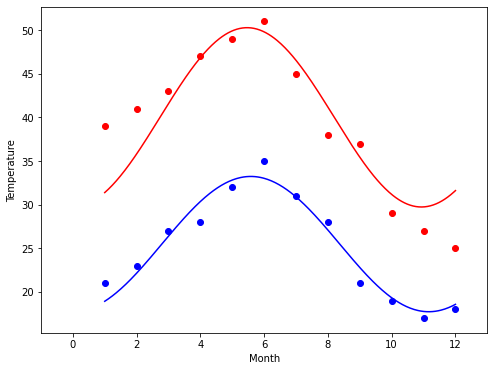

In [4]:
def sine_func(x, a, b, c):
    # y = a*np.exp(-np.power(x - b, 2)/(2*np.power(c, 2)))
    # y = a*np.exp(-1*b*x) + c
    # y = (a + b * np.cos((x + c) * 1.8 * np.pi/ max(x)))
    y = a * np.cos(b * x) + c
    return y


m_max, b_max = curve_fit(sine_func, Month, Max, [0, 0.5, 0])
m_min, b_min = curve_fit(sine_func, Month, Min)

fig = plt.figure(figsize=(8, 6))

days = np.linspace(1, 12, 365)

plt.plot(Month, Max, 'ro')
plt.plot(days, sine_func(days, *m_max), 'r-')
plt.plot(Month, Min, 'bo')
plt.plot(days, sine_func(days, *m_min), 'b-')

plt.xlim(-1, 13)
plt.xlabel("Month")
plt.ylabel("Temperature")

plt.show()

## Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [5]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
titanic['sex'].fillna(titanic['sex'].mode()[0], inplace=True)

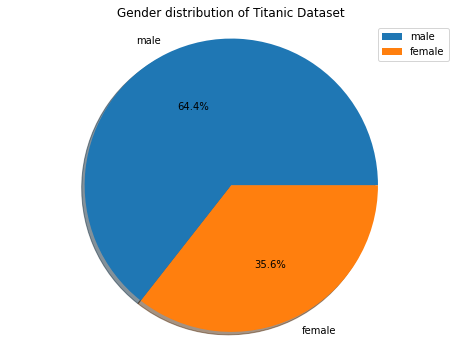

In [7]:
# 1. pie chart presenting the male/female proportion

plt.figure(figsize=(8, 6))
plt.pie(titanic['sex'].value_counts(), labels=['male', 'female'], autopct="%1.1f%%", shadow=True)
plt.legend()
plt.axis('equal')
plt.title("Gender distribution of Titanic Dataset")
plt.show()

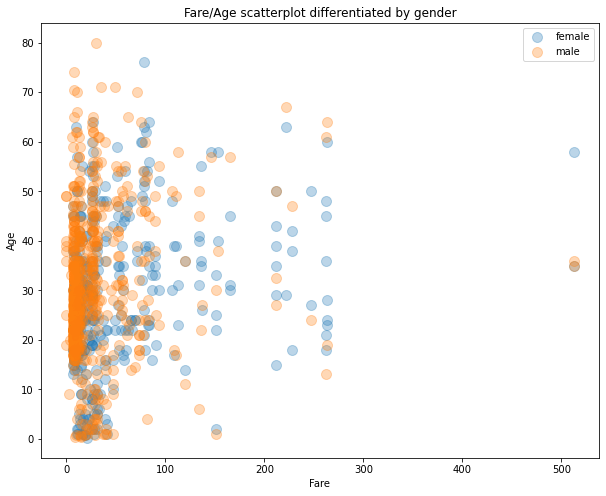

In [9]:
# 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

fig, ax = plt.subplots(figsize=(10, 8))

groups = titanic.groupby('sex')

for name, group in groups:
    ax.scatter(group['fare'], group['age'], label=name, alpha=0.3, s=100)

ax.set_title("Fare/Age scatterplot differentiated by gender")
ax.set_xlabel("Fare")
ax.set_ylabel("Age")
ax.legend()
plt.show()